Each column of A represents measurements taken from a patient. 

There are 216 columns representing 216 patients, out of which 121 have ovarian cancer. 

Each row represents the concentration of a different protein in
the genomic signature of the patient.

In [ ]:
# to get the dataset
# !wget https://www.dropbox.com/s/bal044f83ezxiia/ovariancancer_obs.csv
# !wget https://www.dropbox.com/s/r52sn5gmkd3y797/ovariancancer_grp.csv

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
ovariancancer_obs_path = "./data/ovariancancer_obs.csv"
ovariancancer_grp_path = "./data/ovariancancer_grp.csv"

A = np.genfromtxt(ovariancancer_obs_path, delimiter=",").transpose()
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != ""]
n_features = A.shape[0]
n_patients = A.shape[1]
print("%d features" % n_features)
print("%d patients" % n_patients)

random_seed = 0

4000 features
216 patients


In [6]:
pd.DataFrame(A)

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,0.063915,0.025409,0.025536,0.012817,0.019846,0.039048,0.023195,0.027017,0.039422,0.013438,...,0.014428,0.012106,0.009959,0.011055,0.047978,0.019997,0.042346,0.023558,0.028351,0.027428
1,0.033242,0.051085,0.036123,0.029652,-0.010577,0.039355,0.053826,0.010137,0.038869,0.016477,...,0.004982,0.009175,0.013885,0.007115,0.035882,0.002927,0.031884,0.021331,0.023266,0.027021
2,0.018484,0.056305,0.054195,0.079290,-0.007504,0.001343,0.036954,0.017656,0.031585,0.015752,...,0.021007,0.013792,0.009893,0.000839,0.015669,0.006809,0.049617,0.016210,0.004556,0.015273
3,0.008618,0.021738,0.009735,0.050677,0.019042,0.026221,0.021554,0.011168,0.019633,0.004919,...,0.009764,0.021232,0.004395,0.019313,0.006998,-0.003585,0.031419,0.012324,0.024095,0.026199
4,0.035629,0.027410,0.027521,0.039737,0.068786,0.044091,0.038825,0.036685,0.020858,0.012636,...,0.007973,0.029415,0.018958,0.033643,0.011977,0.026362,0.042043,0.022074,0.018943,0.018178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.012907,0.013187,0.041889,0.026710,0.055744,0.022888,0.018708,0.023676,0.019886,0.010619,...,0.020325,0.010161,0.020119,0.034985,0.018375,0.012212,0.032180,0.009901,0.024089,0.040298
3996,0.023405,0.028573,0.019256,0.025122,0.051084,0.056221,0.020980,0.042698,0.008071,0.018884,...,0.024045,0.017861,0.026923,0.019188,0.025885,0.009340,0.026465,0.011709,0.006737,0.021256
3997,0.038839,0.020427,-0.009447,0.047466,0.036683,0.055819,0.027400,0.002156,0.028927,0.053477,...,0.027946,0.006210,0.013599,0.005770,0.038283,0.020955,0.017850,0.008274,0.010033,0.026642
3998,0.038151,0.023261,0.021481,0.046706,0.043729,0.010087,0.038228,0.011402,0.020660,0.055085,...,0.030748,0.021659,0.006994,0.030328,0.042521,0.010685,0.036014,0.004742,0.017391,0.027718


1. Implement the randommized SVD

In [4]:
def randomized_SVD(A, k):
  m, n = A.shape
  P = np.random.randn(n, k) #generates a random numbers matrix (nxk) according to the standard normal distribution
  Z = A @ P # projection of the matrix in the random matrix space 
  Q, R = np.linalg.qr(Z) # QR factorization to obtain orthogonal matrix Q
  Y = Q.T @ A 
  Uy, sy, VTy = np.linalg.svd(Y, full_matrices = False)
  U = Q @ Uy
  return U, sy, VTy

#### 2. Perform PCA on the data, by using the exact SVD algorithm.
- Then, plot the trend w.r.t. $i$ of the singular values $\sigma_i$.
- Now, repeat the computation by considering the randomized SVD algorithm of rank $k = 1, 5, 10, 50$ and $100$.
- Plot the approximate singular values together with the exact singular values.
- Comment what you see.

In [9]:
A_mean = np.mean(A, axis=1)[:, None] 
# features are the row, samples are the columns

In [13]:
A_norm = (A - A_mean) / np.std(A, axis=1)[:, None]

Text(0.5, 1.0, 'Explained Variance')

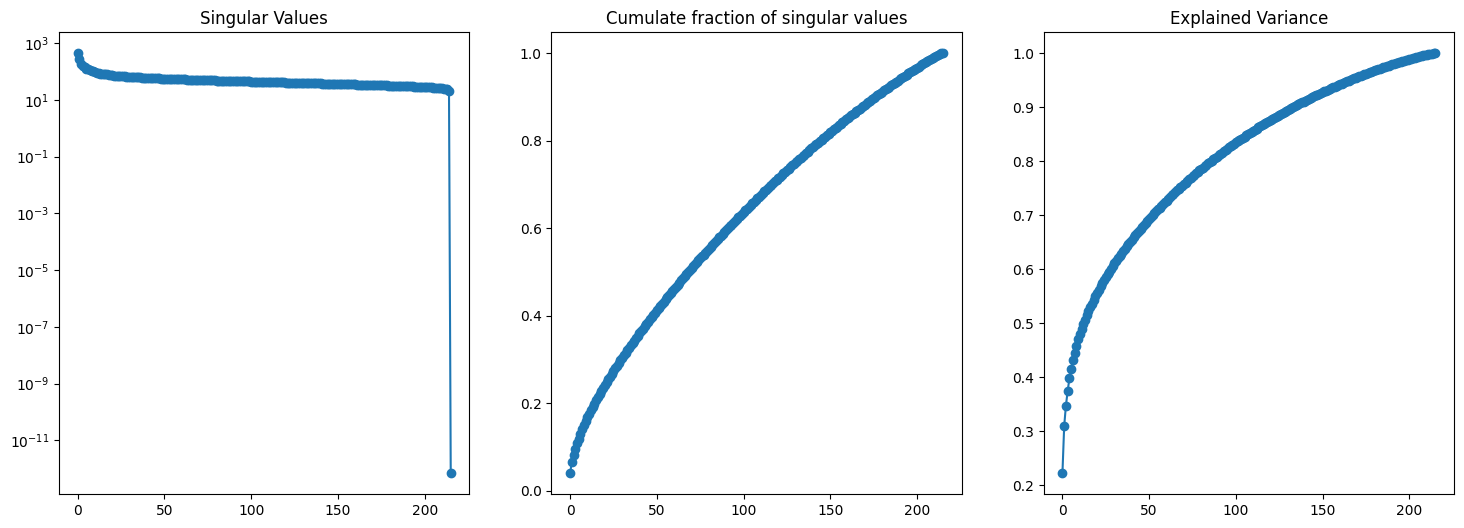

In [17]:
U, s, VT = np.linalg.svd(A_norm, full_matrices=False)

fig, axes = plt.subplots(1, 3, figsize = (18,6))

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singular Values')

axes[1].plot(np.cumsum(s) / np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.cumsum(s**2) / np.sum(s**2), 'o-')
axes[2].set_title('Explained Variance')

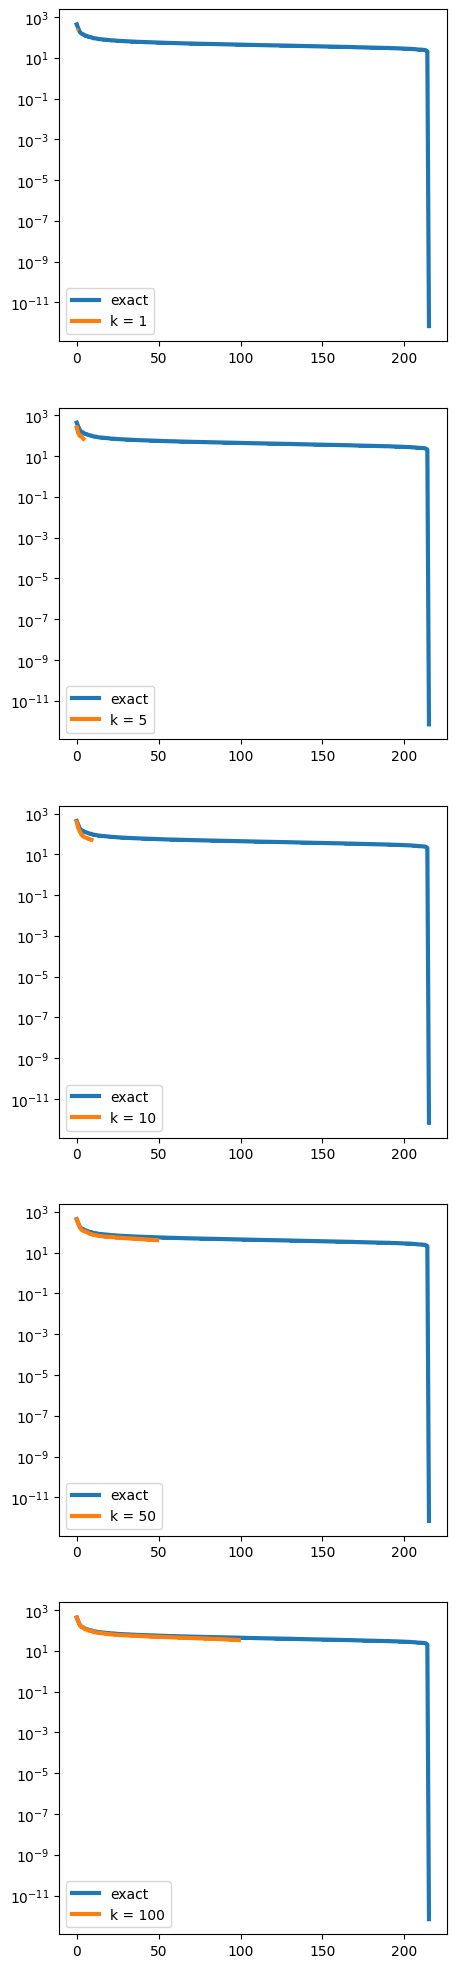

In [19]:
k_array = np.array([1,5,10,50,100])

rs_array = list()

for k in k_array:
    Ur, sr, VTr = randomized_SVD(A_norm, k)
    rs_array.append(sr)

fig, axs = plt.subplots(len(k_array), 1, figsize=(5, 5 * len(k_array)))

i = 0
for rs in rs_array:
    axs[i].plot(s, "o-", label="exact", linewidth=3, markersize=1)
    axs[i].semilogy(rs, "o-", label="k = %d" % k_array[i], linewidth=3, markersize=1)
    axs[i].legend()
    i += 1

We can see that as the rank k of the randomized SVD algorithm increases, the approximation of the singular values becomes more and more accurate.

There is an overall underestimation of the singular values (i.e. less variability is captured), but the approximation is still very good.

3. Use PCA (with exact SVD) to perform dimensionality reduction on the dataset for rank $k = 1, 5, 10, 50$ and $100$.
- Compute the reconstruction error of the dataset as a function of $k$.
- Repeat the same exercise by using the randomized SVD algorithm.
- Repeat the same exercise by using the randomized SVD algorithm with a $+50\%$ oversampling, that is by increasing by $50\%$ the number of columns in the matrix random $P$ (round the quantity $1.5k$ to the closest integer).
- Finally, plot the trend of the reconstruction error of the dataset as a function of $k$ in the three cases.
- Comment on the results.

### Exact SVD

In [21]:
U, s, VT = np.linalg.svd(A_norm, full_matrices=False)

reconstruction_error = list()
ks = np.array([1,5,10,50,100])

for k in ks:
    A_k = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    reconstruction_error.append(np.linalg.norm(A_norm - A_k, ord=2))

### rSVD

In [30]:
reconstruction_error_rsvd = list()
for k in ks:
    rU, rs, rVT = randomized_SVD(A_norm, k)
    A_K = rU @ np.diag(rs) @ rVT
    reconstruction_error_rsvd.append(np.linalg.norm(A_norm - A_K, ord=2))

### rSVD with oversampling

In [23]:
def randomized_SVD_oversampling(A, k, oversampling_size=1.5):
    np.random.seed(random_seed)
    m, n = A.shape
    # create a random matrix
    omega = np.random.rand(n, round(k * oversampling_size))
    Y = A @ omega
    Q, R = np.linalg.qr(Y)
    B = Q.T @ A
    # perform the SVD on B
    rU, rs, rVT = np.linalg.svd(B, full_matrices=False)
    # recover left singular values
    rU = Q @ rU
    return rU, rs, rVT

In [27]:
reconstruction_error_rsvd_os = list()
for k in ks:
    rU, rs, rVT = randomized_SVD_oversampling(A_norm, k)
    A_K = rU @ np.diag(rs) @ rVT
    reconstruction_error_rsvd_os.append(np.linalg.norm(A_norm - A_K, ord=2))

Plot the trend of the reconstruction error of the dataset as a function of k in the three cases.

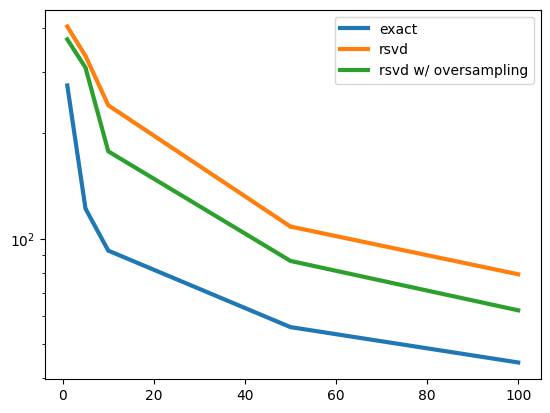

In [31]:
plt.semilogy(ks, reconstruction_error, "o-", label="exact", linewidth=3, markersize=1)
plt.semilogy(ks, reconstruction_error_rsvd, "o-", label="rsvd", linewidth=3, markersize=1)
plt.semilogy(ks, reconstruction_error_rsvd_os, "o-", label="rsvd w/ oversampling", linewidth=3, markersize=1)
plt.legend()

4. Make a scatterplot of the first two principal components of the patients (obtained with exact SVD):
- Plot in **red** patients in the group "cancer".
- Plot in **blue** the patients in the remaining group.
- Repeat the same exercise with a rank $k = 2$ randomized SVD.
- Compute the execution time needed to run the SVD algorithm in the two cases.
- Comment on the results.

PHI SHAPE: (216, 216)


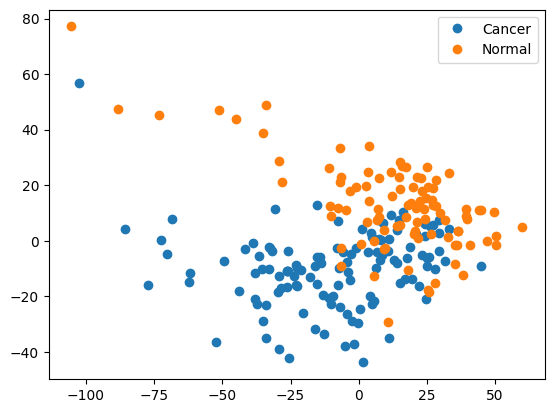

In [33]:
U, s, VT = np.linalg.svd(A_norm, full_matrices=False)

PHI = U.T @ A_norm
print("PHI SHAPE:", PHI.shape)

plt.plot(
    PHI[0, grp == "Cancer"], PHI[1, grp=="Cancer"], "o", label="Cancer"
)
plt.plot(
    PHI[0, grp == "Normal"], PHI[1, grp=="Normal"], "o", label="Normal"
)
plt.legend()

Repeat the same with rank 2 randomized SVD

PHI SHAPE: (2, 216)


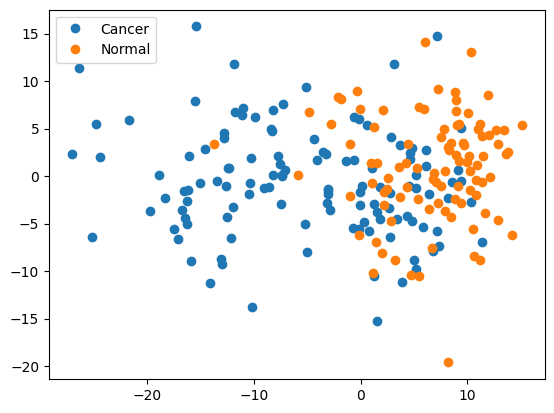

In [34]:
U, s, VT = randomized_SVD(A_norm, 2)

PHI = U.T @ A_norm
print("PHI SHAPE:", PHI.shape)

plt.plot(
    PHI[0, grp == "Cancer"], PHI[1, grp=="Cancer"], "o", label="Cancer"
)
plt.plot(
    PHI[0, grp == "Normal"], PHI[1, grp=="Normal"], "o", label="Normal"
)
plt.legend()

Execution time of the two algorithms:



In [36]:
import time

# exact SVD
t0 = time.time()
U, s, VT = np.linalg.svd(A_norm, full_matrices=False)
t1 = time.time()
print("Exact SVD took %f seconds" % (t1 - t0))

# randomized SVD
k = 2
t0 = time.time()
rU, rs, rVT = randomized_SVD(A_norm, k)
t1 = time.time()
print("Randomized SVD took %f seconds" % (t1 - t0))

Exact SVD took 0.160587 seconds
Randomized SVD took 0.002961 seconds



As we can see the randomized SVD result is different from the exact SVD result, but we still already see a separation between the two groups.

As expected, the randomized SVD is faster than the exact SVD